# Problem Statement

EazyDiner is a table reservation platform for consumers looking for dining places. Will a new customer who signs up with us, make a booking in the first 7 days of signing up? If the probability is <20% then keep it in a 0 bucket otherwise in a 1 bucket.

### 1. Importing neccessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Loading the dataset

In [2]:
#Booking dataset
data_booking=pd.read_excel("Sample_BOOKINGS_Dataset_1.xlsx")  

#Customer dataset
data_customers=pd.read_excel("Sample_CUSTOMER_Dataset_2.xlsx")

### 3. Exploratory Data Analysis

Lets explore the dataset.

In [3]:
data_booking.head()  #looking at the top 5 records in booking dataset

,date,medium,restaurant_name,location,cust_id
0,2020-09-04,web,Spectra,"The Leela Ambience, Gurgaon",5015431352112
1,2020-09-06,google,Barbeque Nation,"Park Street Area, Kolkata",5015431352115
2,2020-09-01,google,Barbeque Nation,"Ambience Mall, Gurgaon",5015431352121
3,2020-09-04,google,Barbeque Pride,"Hitech City, Hyderabad",5015431352122
4,2020-09-06,google,Float Brewery,"Kalyan Nagar, North Bengaluru",5015431352123


In [4]:
data_customers.head()   #looking at the top 5 dataset in the customer dataset

,cust_id,name,city,gender,AGE,medium,signup_date
0,5015431352112,Juhi Agrawal,Delhi NCR,F,72,web,2020-09-01
1,5015431352113,Manish,Delhi NCR,M,45,android,2020-09-01
2,5015431352114,mani,Chennai,M,29,android,2020-09-01
3,5015431352115,Rija,Kolkata,F,60,google,2020-09-01
4,5015431352120,Bharath,NaN,M,32,google,2020-09-01


In [5]:
data_booking.shape  #Checking rows n columns of the booking dataset

(61346, 5)

We observe that there are 61346 rows (i.e records) and 5 columns (i.e features) in booking dataset.

In [6]:
data_customers.shape   #Checking rows n columns of the customer dataset

(98354, 7)

In customer dataset, we observe that there are 98354 rows (i.e records) and 7 columns (i.e features).

Lets check the data types of each column, number of null values in each column, and memory usage of the entire data using **df.info()**.

In [7]:
data_booking.info()  ##Checking info about the booking dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61346 entries, 0 to 61345
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             61346 non-null  datetime64[ns]
 1   medium           61346 non-null  object        
 2   restaurant_name  61346 non-null  object        
 3   location         61346 non-null  object        
 4   cust_id          61346 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 2.3+ MB


**Observations:-**

- Dataset has datetime, object and integer values.
- There are no missing values.
    

In [8]:
##Checking for the null values explicitly in booking dataset
data_booking.isnull().sum()

date               0
medium             0
restaurant_name    0
location           0
cust_id            0
dtype: int64

We can observe that there are no null values in booking dataset.

In [9]:
#Statistical Analysis of customer dataset
data_booking.describe()

,cust_id
count,6.134600e+04
mean,5.015432e+12
std,6.362351e+05
min,5.015431e+12
25%,5.015432e+12
50%,5.015432e+12
75%,5.015433e+12
max,5.015433e+12


**cust_id** is unique for every customer.

**Checking for the duplicates.**

In [10]:
duplicate_booking=data_booking[data_booking.duplicated()]
duplicate_booking.shape

(0, 5)

There are no duplicates, thus we are good to go.

In [11]:
data_customers.info()  ##Checking info about the booking dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98354 entries, 0 to 98353
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   cust_id      98354 non-null  int64         
 1   name         92756 non-null  object        
 2   city         80621 non-null  object        
 3   gender       4700 non-null   object        
 4   AGE          98354 non-null  int64         
 5   medium       98354 non-null  object        
 6   signup_date  98354 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 5.3+ MB


**Observation:-**

- The data has integer, object and datetime values.
- Missing values are present in some columns.

In [12]:
##Checking for the null values explicitly in customer dataset
data_customers.isnull().sum()

cust_id            0
name            5598
city           17733
gender         93654
AGE                0
medium             0
signup_date        0
dtype: int64

Here, we can observe that in columns **name**, **city**, **gender** there are some null values, thus we have to do some cleaning of the customer dataset.

In [13]:
#Lets Check the percentage of missing values of NaN values in each feature

features_with_na=[features for features in data_customers.columns if data_customers[features].isnull().sum()>1]
for feature in features_with_na:
    print(feature, np.round(data_customers[feature].isnull().mean(), 4),  ' % missing values')

name 0.0569  % missing values
city 0.1803  % missing values
gender 0.9522  % missing values


Plotting the graph for the missing values in customer dataset.

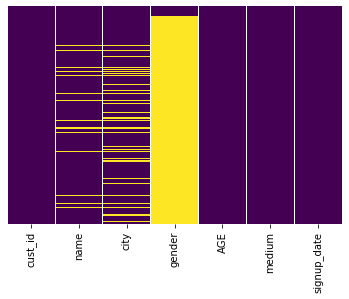

In [14]:
sns.heatmap(data_customers.isnull(),yticklabels=False,cbar=False,cmap='viridis')

We can see that in gender column there are almost 95% values which are missing.

**Checking for duplicates**

In [15]:
duplicate_customers = data_customers[data_customers.duplicated()]
duplicate_customers.shape

(0, 7)

No duplicates are found in customer dataset.

In [16]:
#Statistical Analysis of the customer dataset
data_customers.describe()

,cust_id,AGE
count,9.835400e+04,98354.000000
mean,5.015432e+12,44.000081
std,6.320328e+05,19.809041
min,5.015431e+12,14.000000
25%,5.015432e+12,27.000000
50%,5.015432e+12,39.000000
75%,5.015433e+12,60.000000
max,5.015433e+12,84.000000


**cust_id** is unique for the customer.

Lets merge the two datasets on column **cust_id**. We will use keys from right dataframe i.e data_customers otherwise we will loose around 20k precious data.

In [17]:
data=pd.merge(data_booking,data_customers,on='cust_id',how='right')

In [18]:
data.head() #Looking at top 5 records of merged dataset

,date,medium_x,restaurant_name,location,cust_id,name,city,gender,AGE,medium_y,signup_date
0,2020-09-04,web,Spectra,"The Leela Ambience, Gurgaon",5015431352112,Juhi Agrawal,Delhi NCR,F,72,web,2020-09-01
1,2020-09-06,google,Barbeque Nation,"Park Street Area, Kolkata",5015431352115,Rija,Kolkata,F,60,google,2020-09-01
2,2020-09-01,google,Barbeque Nation,"Ambience Mall, Gurgaon",5015431352121,Aparna,Delhi NCR,F,27,google,2020-09-01
3,2020-09-04,google,Barbeque Pride,"Hitech City, Hyderabad",5015431352122,Pavan Sai Chandra,Hyderabad,M,69,google,2020-09-01
4,2020-09-06,google,Float Brewery,"Kalyan Nagar, North Bengaluru",5015431352123,Vaseem,Bengaluru,M,38,google,2020-09-01


In [19]:
data.shape  #Checking the shape of the merged dataset

(98354, 11)

There are 98354 rows (i.e records) and 11 columns(i.e features) in the merged dataset.

In [20]:
## Checking for duplicate values if any
data[data.duplicated(subset=['cust_id'],keep='first')]

,date,medium_x,restaurant_name,location,cust_id,name,city,gender,AGE,medium_y,signup_date


We can see that there are no duplicated values in the merged dataset, thus we can proceed further.

In [21]:
data.info()  #Checking info for merged dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98354 entries, 0 to 98353
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             61346 non-null  datetime64[ns]
 1   medium_x         61346 non-null  object        
 2   restaurant_name  61346 non-null  object        
 3   location         61346 non-null  object        
 4   cust_id          98354 non-null  int64         
 5   name             92756 non-null  object        
 6   city             80621 non-null  object        
 7   gender           4700 non-null   object        
 8   AGE              98354 non-null  int64         
 9   medium_y         98354 non-null  object        
 10  signup_date      98354 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 9.0+ MB


In [22]:
#Checking for the null values explicitly
data.isnull().sum()

date               37008
medium_x           37008
restaurant_name    37008
location           37008
cust_id                0
name                5598
city               17733
gender             93654
AGE                    0
medium_y               0
signup_date            0
dtype: int64

**Observation :-**

- Number of missing values in the **'gender'** column are very high, so we can directly drop them.
- For columns- **'date'**, **'medium_x'**, **'restaurant_name'**, and **'location'** missing value count is same, thus it can be infered that those customers have not done booking after signing up, hence these customers will go under bucket 0.
- Apart from those columns **'name'** and **'city'** also have some null values, we have to do some feature engineering for replacing the null values.
    

Lets gain some more insights from the dataset.

**Numerical Variables**

In [23]:
#Checking for numerical variables in the merged dataset
numerical_features = [feature for feature in data.columns if data[feature].dtypes != 'O' and feature not in ['date','signup_date']]

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
data[numerical_features].head()

Number of numerical variables:  2


,cust_id,AGE
0,5015431352112,72
1,5015431352115,60
2,5015431352121,27
3,5015431352122,69
4,5015431352123,38


**cust_id** is categorical feature which is displayed as integer features.      
Lets check its unique value.

In [24]:
print(len(data['cust_id'].unique()))

98354


It indicates that all the values in **cust_id** is unique as the count is same as that of number of records.

**Categorical Variables**

In [25]:
categorical_features=[feature for feature in data.columns if data[feature].dtypes=='O']
categorical_features  

['medium_x',
 'restaurant_name',
 'location',
 'name',
 'city',
 'gender',
 'medium_y']

Lets check for the unique values in all these columns.

In [26]:
for i in categorical_features:
    print("{} : {}".format(i,len(data[i].unique())))

medium_x : 7
restaurant_name : 2314
location : 1232
name : 44874
city : 168
gender : 5
medium_y : 6


Lets plot some graphs to understand the data even more.

**(i) medium_x**

In [27]:
data['medium_x'].value_counts()

google         51683
android         3736
web             3134
concierge       1462
ios             1281
api_partner       50
Name: medium_x, dtype: int64

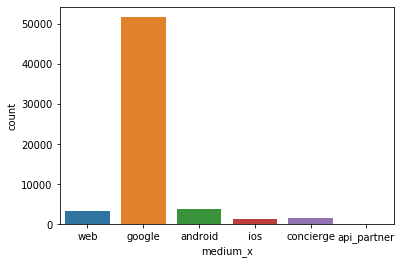

In [28]:
sns.countplot('medium_x',data=data)

**(ii) gender**

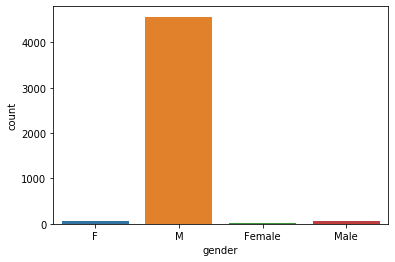

In [29]:
sns.countplot('gender',data=data)

This column has actually only two categories but the naming is different.

**(iii) medium_y**

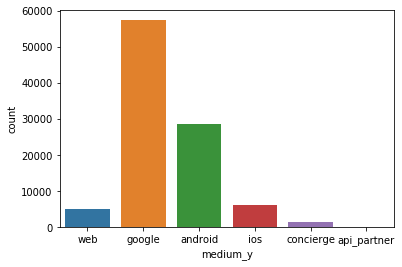

In [30]:
sns.countplot('medium_y',data=data)

We can observe that there are same categories in the medium_x (i.e booking medium) and medium_y(signup medium).

Lets create another column, say, 'days' giving the number of days a customer taken for booking the diner after signing up.

In [31]:
from datetime import date
data['days']=(data['date']-data['signup_date']).astype('timedelta64[D]')

In [32]:
data.head()

,date,medium_x,restaurant_name,location,cust_id,name,city,gender,AGE,medium_y,signup_date,days
0,2020-09-04,web,Spectra,"The Leela Ambience, Gurgaon",5015431352112,Juhi Agrawal,Delhi NCR,F,72,web,2020-09-01,3.0
1,2020-09-06,google,Barbeque Nation,"Park Street Area, Kolkata",5015431352115,Rija,Kolkata,F,60,google,2020-09-01,5.0
2,2020-09-01,google,Barbeque Nation,"Ambience Mall, Gurgaon",5015431352121,Aparna,Delhi NCR,F,27,google,2020-09-01,0.0
3,2020-09-04,google,Barbeque Pride,"Hitech City, Hyderabad",5015431352122,Pavan Sai Chandra,Hyderabad,M,69,google,2020-09-01,3.0
4,2020-09-06,google,Float Brewery,"Kalyan Nagar, North Bengaluru",5015431352123,Vaseem,Bengaluru,M,38,google,2020-09-01,5.0


In [33]:
data.isnull().sum()

date               37008
medium_x           37008
restaurant_name    37008
location           37008
cust_id                0
name                5598
city               17733
gender             93654
AGE                    0
medium_y               0
signup_date            0
days               37008
dtype: int64

Lets clean our dataset now.

### 4. Data Cleaning & Pre-processing

**(i) 'gender' Column**

This column has almost 95% missing values thus we can drop it.

In [34]:
# Dropping the gender column
data=data.drop(['gender'],axis=1)
data.head()

,date,medium_x,restaurant_name,location,cust_id,name,city,AGE,medium_y,signup_date,days
0,2020-09-04,web,Spectra,"The Leela Ambience, Gurgaon",5015431352112,Juhi Agrawal,Delhi NCR,72,web,2020-09-01,3.0
1,2020-09-06,google,Barbeque Nation,"Park Street Area, Kolkata",5015431352115,Rija,Kolkata,60,google,2020-09-01,5.0
2,2020-09-01,google,Barbeque Nation,"Ambience Mall, Gurgaon",5015431352121,Aparna,Delhi NCR,27,google,2020-09-01,0.0
3,2020-09-04,google,Barbeque Pride,"Hitech City, Hyderabad",5015431352122,Pavan Sai Chandra,Hyderabad,69,google,2020-09-01,3.0
4,2020-09-06,google,Float Brewery,"Kalyan Nagar, North Bengaluru",5015431352123,Vaseem,Bengaluru,38,google,2020-09-01,5.0


**(ii) 'days' Column**

In [35]:
#checking the missing value of this column
data['days'].isnull().sum()

37008

Lets create a column named **'Booking'**, based on the number of days, denoting whether customer has done any booking within 7 days of signing up or not.

If the customer has signed up within 7 days then we will allocate '1' value to booking column, otherwise we will allocate '0'. For null values in days column we will allocate the value in booking column as '0' only as it can be observed that this missing data is present because the given customer has not booked anything after signing up.

In [36]:
data['Booking']=np.where(data['days']>7,0,np.where(data['days'].isnull(),0,1))

In [37]:
data.head()

,date,medium_x,restaurant_name,location,cust_id,name,city,AGE,medium_y,signup_date,days,Booking
0,2020-09-04,web,Spectra,"The Leela Ambience, Gurgaon",5015431352112,Juhi Agrawal,Delhi NCR,72,web,2020-09-01,3.0,1
1,2020-09-06,google,Barbeque Nation,"Park Street Area, Kolkata",5015431352115,Rija,Kolkata,60,google,2020-09-01,5.0,1
2,2020-09-01,google,Barbeque Nation,"Ambience Mall, Gurgaon",5015431352121,Aparna,Delhi NCR,27,google,2020-09-01,0.0,1
3,2020-09-04,google,Barbeque Pride,"Hitech City, Hyderabad",5015431352122,Pavan Sai Chandra,Hyderabad,69,google,2020-09-01,3.0,1
4,2020-09-06,google,Float Brewery,"Kalyan Nagar, North Bengaluru",5015431352123,Vaseem,Bengaluru,38,google,2020-09-01,5.0,1


In [38]:
data['Booking'].isnull().sum()

0

We can replace the null values in **'days'** column with some number greater than 7, as we know all missing values corresponds to '0' in Booking  column.

In [39]:
data['days']=data['days'].fillna(8)

In [40]:
data['days'].isnull().sum()

0

In [41]:
data['days']=data['days'].astype(int)
data['days']

0        3
1        5
2        0
3        3
4        5
        ..
98349    8
98350    8
98351    8
98352    8
98353    8
Name: days, Length: 98354, dtype: int32

**(iii) 'medium_x' column**

Lets check whether **signup medium(i.e medium_y)** & **booking medium (i.e medium_x)** are same.

In [42]:
data['medium_x'].unique()  #Checking for unique values in medium_x

array(['web', 'google', 'android', 'ios', 'concierge', 'api_partner', nan],
      dtype=object)

In [43]:
data['medium_y'].unique() #Checking for unique values in medium_y

array(['web', 'google', 'android', 'ios', 'concierge', 'api_partner'],
      dtype=object)

In [44]:
data[['medium_x','medium_y']]

,medium_x,medium_y
0,web,web
1,google,google
2,google,google
3,google,google
4,google,google
...,...,...
98349,NaN,google
98350,NaN,android
98351,NaN,android
98352,NaN,android


In [45]:
data.shape[0]  #Total no. of records

98354

In [46]:
##Checking whether signing up medium is same as booking medium

count=0
for i in range(data.shape[0]):
    if(data['medium_x'][i]==data['medium_y'][i]):
        count=count+1
print('Total Records: {}'.format(data.shape[0]))
print('No. of same records: {}'.format(count))
print("Missing values in 'medium_x' column: {}".format(data['medium_x'].isnull().sum()))
print("No. of different records: {}".format(data['medium_x'].notna().sum()-count))

Total Records: 98354
No. of same records: 55382
Missing values in 'medium_x' column: 37008
No. of different records: 5964


Lets plot for both columns 'medium_x' and 'medium_y'.

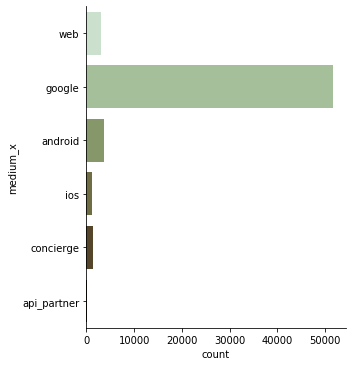

In [47]:
sns.catplot(y = 'medium_x', kind = 'count',palette = 'ch:0.95',data = data)

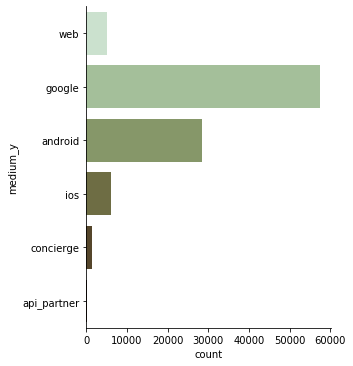

In [48]:
sns.catplot(y = 'medium_y', kind = 'count',palette = 'ch:0.95',data = data)

From all above observations, we can say that since not all the customers who has signed up has necesarily booked, it had lead to high number of missing values in **medium_x** column.     

We cannot say that both the columns have same values as around 5964 values are different, so instead of filling any missing value, lets create another column named **Medium** having values of **medium_x** and then filling null values with the values in **medium_y**.

In [49]:
data['Medium']=data['medium_x'].fillna(data['medium_y'])
data.head()

,date,medium_x,restaurant_name,location,cust_id,name,city,AGE,medium_y,signup_date,days,Booking,Medium
0,2020-09-04,web,Spectra,"The Leela Ambience, Gurgaon",5015431352112,Juhi Agrawal,Delhi NCR,72,web,2020-09-01,3,1,web
1,2020-09-06,google,Barbeque Nation,"Park Street Area, Kolkata",5015431352115,Rija,Kolkata,60,google,2020-09-01,5,1,google
2,2020-09-01,google,Barbeque Nation,"Ambience Mall, Gurgaon",5015431352121,Aparna,Delhi NCR,27,google,2020-09-01,0,1,google
3,2020-09-04,google,Barbeque Pride,"Hitech City, Hyderabad",5015431352122,Pavan Sai Chandra,Hyderabad,69,google,2020-09-01,3,1,google
4,2020-09-06,google,Float Brewery,"Kalyan Nagar, North Bengaluru",5015431352123,Vaseem,Bengaluru,38,google,2020-09-01,5,1,google


**(iv) 'city' Column**

Lets check whether there is any relation between city and booking.

In [50]:
data.groupby(data['city'].isnull()).Booking.value_counts().unstack('city')

city,False,True
Booking,,
0,25921.0,17733.0
1,54700.0,NaN


We can see from above table that all the null values corresponds to '0' in the booking column.Instead of dropping those records, we can create a new category(say- **city_null**) in this column.

In [51]:
## Replacing the null values with a new category
data['city']=data['city'].fillna('city_null')

In [52]:
data[data['city']=='city_null'].head() 

,date,medium_x,restaurant_name,location,cust_id,name,city,AGE,medium_y,signup_date,days,Booking,Medium
61348,NaT,NaN,NaN,NaN,5015431352120,Bharath,city_null,32,google,2020-09-01,8,0,google
61351,NaT,NaN,NaN,NaN,5015431352140,NaN,city_null,40,android,2020-09-01,8,0,android
61352,NaT,NaN,NaN,NaN,5015431352142,NaN,city_null,18,android,2020-09-01,8,0,android
61353,NaT,NaN,NaN,NaN,5015431352143,Harish,city_null,63,google,2020-09-01,8,0,google
61354,NaT,NaN,NaN,NaN,5015431352144,Sakina,city_null,49,google,2020-09-01,8,0,google


**(v) 'restaurant_name' Column**

In [53]:
#Checking for relation between restaurant_name and Booking status
data.groupby(data['restaurant_name'].isnull()).Booking.value_counts().unstack('restaurant_name')

restaurant_name,False,True
Booking,,
0,6646.0,37008.0
1,54700.0,NaN


Here also, all null values corresponds to '0' in the Booking column as seen in the city column. Therefore, for this column too, we will create a new category say- **'restaurant_null'**.

In [54]:
data['restaurant_name']=data['restaurant_name'].fillna('restaurant_null')

In [55]:
data[data['restaurant_name']=='restaurant_null'].head()

,date,medium_x,restaurant_name,location,cust_id,name,city,AGE,medium_y,signup_date,days,Booking,Medium
61346,NaT,NaN,restaurant_null,NaN,5015431352113,Manish,Delhi NCR,45,android,2020-09-01,8,0,android
61347,NaT,NaN,restaurant_null,NaN,5015431352114,mani,Chennai,29,android,2020-09-01,8,0,android
61348,NaT,NaN,restaurant_null,NaN,5015431352120,Bharath,city_null,32,google,2020-09-01,8,0,google
61349,NaT,NaN,restaurant_null,NaN,5015431352124,Sonu Kumar shaw,Kolkata,32,android,2020-09-01,8,0,android
61350,NaT,NaN,restaurant_null,NaN,5015431352135,Mohammad anas,Delhi NCR,32,android,2020-09-01,8,0,android


**(vi) 'location' Column**

In [56]:
#Checking for relation between location and Booking status
data.groupby(data['location'].isnull()).Booking.value_counts().unstack('location')

location,False,True
Booking,,
0,6646.0,37008.0
1,54700.0,NaN


It is also similar case as that of **'city'** and **'restaurant_name'** columns, therefore , here also we will create a new category called **'location_null'** and replace all the null values in **'location'** column with it.

In [57]:
data['location']=data['location'].fillna('location_null')

In [58]:
data[data['location']=='location_null'].head()

,date,medium_x,restaurant_name,location,cust_id,name,city,AGE,medium_y,signup_date,days,Booking,Medium
61346,NaT,NaN,restaurant_null,location_null,5015431352113,Manish,Delhi NCR,45,android,2020-09-01,8,0,android
61347,NaT,NaN,restaurant_null,location_null,5015431352114,mani,Chennai,29,android,2020-09-01,8,0,android
61348,NaT,NaN,restaurant_null,location_null,5015431352120,Bharath,city_null,32,google,2020-09-01,8,0,google
61349,NaT,NaN,restaurant_null,location_null,5015431352124,Sonu Kumar shaw,Kolkata,32,android,2020-09-01,8,0,android
61350,NaT,NaN,restaurant_null,location_null,5015431352135,Mohammad anas,Delhi NCR,32,android,2020-09-01,8,0,android


In [59]:
data.isnull().sum()

date               37008
medium_x           37008
restaurant_name        0
location               0
cust_id                0
name                5598
city                   0
AGE                    0
medium_y               0
signup_date            0
days                   0
Booking                0
Medium                 0
dtype: int64

Lets create another dataframe and keep only those features which are required (**'restaurant_name', 'location', 'city', 'AGE', 'Medium', 'Booking'**)

In [76]:
cleaned_data=data[['restaurant_name','location','city','AGE','Medium','Booking']]
cleaned_data.head()

,restaurant_name,location,city,AGE,Medium,Booking
0,Spectra,"The Leela Ambience, Gurgaon",Delhi NCR,72,web,1
1,Barbeque Nation,"Park Street Area, Kolkata",Kolkata,60,google,1
2,Barbeque Nation,"Ambience Mall, Gurgaon",Delhi NCR,27,google,1
3,Barbeque Pride,"Hitech City, Hyderabad",Hyderabad,69,google,1
4,Float Brewery,"Kalyan Nagar, North Bengaluru",Bengaluru,38,google,1


In [77]:
cleaned_data.isnull().sum()

restaurant_name    0
location           0
city               0
AGE                0
Medium             0
Booking            0
dtype: int64

There are no missing values we are good to proceed further.

### 5. Feature Engineering

Lets again check the type of variables.

**Numerical Features**

In [78]:
numerical_features = [feature for feature in cleaned_data.columns if cleaned_data[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
cleaned_data[numerical_features].head()

Number of numerical variables:  2


,AGE,Booking
0,72,1
1,60,1
2,27,1
3,69,1
4,38,1


Among the three columns :- **AGE** is the only **continuous numerical feature** and other **(Booking)** discrete numerical features.

Lets check for the outlier in the numerical continuous feature **'AGE'**

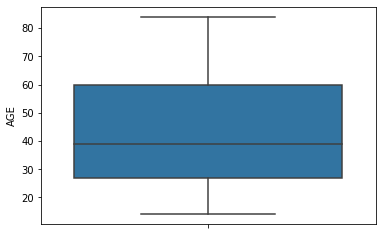

In [79]:
sns.boxplot(y='AGE',data=cleaned_data)

No outliers are present.

**Categorical Variables**

In [80]:
categorical_features=[feature for feature in cleaned_data.columns if cleaned_data[feature].dtypes=='O']
categorical_features  

['restaurant_name', 'location', 'city', 'Medium']

We cannot directly pass the categorical data into the model, thus for all these column we have to apply encoding techniques.

There are two types of encoding techniques for categorical features:-    

1) **One-Hot Encoding** :- It creates additional feature on the basis of number of unique values and then added to the dataframe as a new feature.           
2) **Label Encoding** :- In this technique, each label is assigned a unique integer based on alphabetical ordering.

Lets first check the count of unique categories in all these columns.

In [81]:
for features in categorical_features:
    print("{} : {}".format(features,len(cleaned_data[features].unique())))

restaurant_name : 2314
location : 1232
city : 168
Medium : 6


We can observe that unique values for columns :- **restaurant_name**, **location**, and **city** are pretty high.      

If we will apply one-hot encoding technique to those features there is greater chance that it will overfit the data, and also increase the complexity. Instead, we can apply label encoding to these features.

**Label Encoding**

In [82]:
from sklearn.preprocessing import LabelEncoder

In [83]:
le=LabelEncoder()

for col in categorical_features:
    if col in cleaned_data.columns:
        i = cleaned_data.columns.get_loc(col)
        cleaned_data.iloc[:,i] = cleaned_data.apply(lambda i:le.fit_transform(i.astype(str)), axis=0, result_type='expand')
        
cleaned_data.head()    

C:\Users\Ankita\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,restaurant_name,location,city,AGE,Medium,Booking
0,1747,1090,38,72,5,1
1,224,749,86,60,3,1
2,224,42,38,27,3,1
3,225,388,56,69,3,1
4,705,529,21,38,3,1


**Correlation Matrix with Heatmap**      

Correlation is a statistical measure. Data correlation is a way to understand the relationship between multiple values or features in the dataset.

There are three different types of correlations:

1) **Positive Correlation** :-  value of one variable increases then the value of the other variable(s) also increases and vice versa

2) **Negative Correlation** :-  This occurs when the value of one variable increases and the value of another variable(s) decreases (inversely proportional)

3) **No Correlation** :- Two features might not have any relationship with each other. This happens when the value of a variable is changed then the value of the other variable is not impacted.

Lets check how each feature is related to others using corr() function.

In [84]:
cleaned_data.corr()

,restaurant_name,location,city,AGE,Medium,Booking
restaurant_name,1.000000,0.580701,0.301146,-0.157748,-0.408827,-0.737928
location,0.580701,1.000000,0.440160,-0.123479,-0.343700,-0.624501
city,0.301146,0.440160,1.000000,0.088297,-0.052006,-0.390937
AGE,-0.157748,-0.123479,0.088297,1.000000,0.209604,0.167040
Medium,-0.408827,-0.343700,-0.052006,0.209604,1.000000,0.440013
Booking,-0.737928,-0.624501,-0.390937,0.167040,0.440013,1.000000


Creating a pictorial visualisation of the above correlation matrix using a heatmap helps in better understanding. We can do that using Seaborn's Heatmap function.

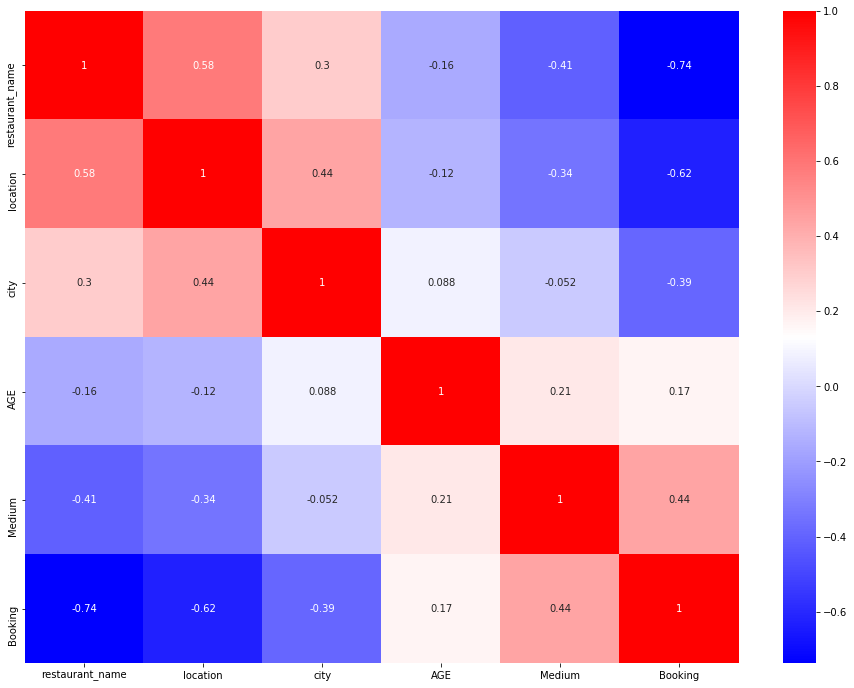

In [85]:
plt.figure(figsize=(16,12))
sns.heatmap(cleaned_data.corr(),cmap='bwr',annot=True)

Considering **Booking** feature as target variable, it has positive correlation with **Medium** feature, negative correaltion with **restaurant_name**, **location**, & **city** features and no correlation or very less correlation with **AGE** feature.

**Scaling the data before splitting into training & testing data.**

In [86]:
X=cleaned_data.drop(['Booking'],axis=1)
y=cleaned_data['Booking']

In [87]:
scalar = StandardScaler()

x_transform = scalar.fit_transform(X)

**Checking for multicollinearity.**

In [88]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif["Features"] = X.columns

In [89]:
vif

,VIF,Features
0,1.656622,restaurant_name
1,1.775841,location
2,1.299114,city
3,1.077120,AGE
4,1.274262,Medium


All vif values are < 5. Therefore, there is no multicollinearity among the features.

### 6. Splitting data into Test and Train

In [90]:
from sklearn.model_selection import train_test_split
#70-30 split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.3, random_state=143)

In [91]:
# Checking split 
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (68847, 5)
y_train: (68847,)
X_test: (29507, 5)
y_test: (29507,)


Checking whether y_train and y_test data is balanced or not.

In [92]:
y_train.value_counts()

1    38271
0    30576
Name: Booking, dtype: int64

In [93]:
y_test.value_counts()

1    16429
0    13078
Name: Booking, dtype: int64

Both y_train and y_test data are balanced.

### Model Building

We will try various algorithms on the dataset:-      

1) Decision Tree Classifier         
2) Random Forest Classifier           
3) Gaussian Naive Bayes   
4) Support Vector Classifier                 

In [94]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, recall_score, precision_score
from sklearn.metrics import f1_score, classification_report

**1. Decision Tree Classifier**

In [95]:
#importing Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Creating Decision Tree classifer object
DT = DecisionTreeClassifier(max_depth=10)

# Train the Classifier/fitting the model
DT.fit(X_train,y_train)

# predict the response
y_pred_dt = DT.predict(X_test)
acc_dt = round(DT.score(X_test,y_test) * 100, 2)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import accuracy_score 

# evaluate accuracy
print("Decision Tree")
print ("Training Accuracy: {} %".format(DT.score(X_train,y_train)*100))
print ("Testing Accuracy: {} %".format(acc_dt))
print ("Decision Tree Accuracy: {} %".format(metrics.accuracy_score(y_test, y_pred_dt)*100))

Decision Tree
Training Accuracy: 93.60320711142097 %
Testing Accuracy: 92.91 %
Decision Tree Accuracy: 92.91354593825194 %


In [143]:
print("Recall score : ", recall_score(y_test, y_pred_dt , average='weighted'))
print("Precision score : ",precision_score(y_test, y_pred_dt , average='weighted'))
print("F1 score : ",f1_score(y_test, y_pred_dt , average='weighted'))

Recall score :  0.9291354593825194
Precision score :  0.9352435283900091
F1 score :  0.9283254040768701


In [97]:
#Creating a confusion matrix and printing the accuracy score 
cm = confusion_matrix(y_test, y_pred_dt)
print(cm)
print('Accuracy : {}'.format(accuracy_score(y_test, y_pred_dt)))

[[11106  1972]
 [  119 16310]]
Accuracy : 0.9291354593825194


**2. Random Forest Classifier**

In [98]:
# Importing Random forest classifier 
from sklearn.ensemble import RandomForestClassifier

# Create a random forest Classifier
RF = RandomForestClassifier(n_jobs=2, random_state=0)

# Train the Classifier/fitting the model
RF.fit(X_train, y_train)

# predict the response
y_pred_rf = RF.predict(X_test)
acc_rf = round(RF.score(X_test,y_test) * 100, 2)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# evaluate accuracy
print ("Random Forest")
print ("Training Accuracy: {} %".format(RF.score(X_train,y_train)*100))
print ("Testing Accuracy: {} %".format(acc_rf))
print ("Random Forest Accuracy: {} %".format(metrics.accuracy_score(y_test, y_pred_rf)*100))

Random Forest
Training Accuracy: 97.44941682281 %
Testing Accuracy: 91.79 %
Random Forest Accuracy: 91.78500016945131 %


In [144]:
print("Recall score : ", recall_score(y_test, y_pred_rf , average='weighted'))
print("Precision score : ",precision_score(y_test, y_pred_rf , average='weighted'))
print("F1 score : ",f1_score(y_test, y_pred_rf , average='weighted'))

Recall score :  0.9178500016945131
Precision score :  0.9199599257752596
F1 score :  0.917318789909756


In [146]:
#Creating a confusion matrix and printing the accuracy score 
cm = confusion_matrix(y_test, y_pred_rf)
print(cm)
print('Accuracy : {}'.format(accuracy_score(y_test, y_pred_rf)))

[[11263  1815]
 [  609 15820]]
Accuracy : 0.9178500016945131


**3. Gaussian Naive Bayes**

In [101]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

# Train the Classifier/fitting the model
gnb.fit(X_train, y_train)

# predict the response
y_pred_gnb = gnb.predict(X_test)
acc_gnb = round(gnb.score(X_test,y_test) * 100, 2)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# evaluate accuracy
print("Gaussain Naive Bayes")
print ("Training Accuracy: {} %".format(gnb.score(X_train,y_train)*100))
print ("Testing Accuracy: {} %".format(acc_gnb))
print("GaussianNB Accuracy: {} %".format(metrics.accuracy_score(y_test, y_pred_gnb)*100))


Gaussain Naive Bayes
Training Accuracy: 90.16224381599778 %
Testing Accuracy: 89.94 %
GaussianNB Accuracy: 89.94475887077643 %


In [147]:
print("Recall score : ", recall_score(y_test, y_pred_gnb , average='weighted'))
print("Precision score : ",precision_score(y_test, y_pred_gnb , average='weighted'))
print("F1 score : ",f1_score(y_test, y_pred_gnb , average='weighted'))

Recall score :  0.8994475887077643
Precision score :  0.8995010113884399
F1 score :  0.899231067697359


In [148]:
#Creating a confusion matrix and printing the accuracy score 
cm = confusion_matrix(y_test, y_pred_gnb)
print(cm)
print('Accuracy : {}'.format(accuracy_score(y_test, y_pred_gnb)))

[[11354  1724]
 [ 1243 15186]]
Accuracy : 0.8994475887077643


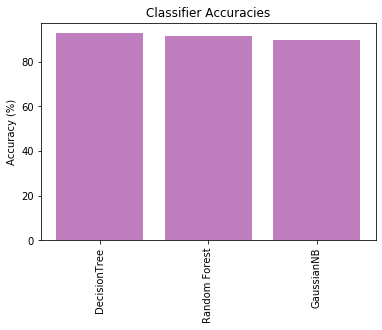

In [104]:
# visualizing accuracies for all ML Algorithms using Matplotlib
predictors_group = ('DecisionTree','Random Forest', 'GaussianNB') 
x_pos = np.arange(len(predictors_group))
accuracies1 = [acc_dt, acc_rf, acc_gnb]
    
plt.bar(x_pos, accuracies1, align='center', alpha=0.5, color='purple')
plt.xticks(x_pos, predictors_group, rotation='vertical')
plt.ylabel('Accuracy (%)')
plt.title('Classifier Accuracies')
plt.show()

In [105]:
#printing top three accuracies

print('Decision Tree:', acc_dt,'%')
print('Random Forest:', acc_rf,'%')
print('GaussianNB:',acc_gnb,'%')

Decision Tree: 92.91 %
Random Forest: 91.79 %
GaussianNB: 89.94 %


**4. Support Vector Classifier**

In [106]:
#Importing Support Vector Machine model
from sklearn.svm import SVC, LinearSVC

#Creating a Support Vector Classfier
svc=LinearSVC()

# Train the Classifier/fitting the model
svc.fit(X_train,y_train)

# predict the response
y_pred_svc = svc.predict(X_test)
acc_svc = round(svc.score(X_test,y_test) * 100, 2)

from sklearn.metrics import accuracy_score

# evaluate accuracy
print("Support Vector Classifier")
print ("Training Accuracy: {} %".format(svc.score(X_train,y_train)*100))
print ("Testing Accuracy: {} %".format(acc_svc))
print("SVC Accuracy: {} %".format(metrics.accuracy_score(y_test, y_pred_svc)*100))


Support Vector Classifier
Training Accuracy: 90.71709733176463 %
Testing Accuracy: 90.5 %
SVC Accuracy: 90.5005591893449 %


In [149]:
print("Recall score : ", recall_score(y_test, y_pred_svc , average='weighted'))
print("Precision score : ",precision_score(y_test, y_pred_svc , average='weighted'))
print("F1 score : ",f1_score(y_test, y_pred_svc , average='weighted'))

Recall score :  0.905005591893449
Precision score :  0.9057527317915972
F1 score :  0.9046073642181792


In [150]:
#Creating a confusion matrix and printing the accuracy score 
cm = confusion_matrix(y_test, y_pred_svc)
print(cm)
print('Accuracy : {}'.format(accuracy_score(y_test, y_pred_svc)))

[[11251  1827]
 [  976 15453]]
Accuracy : 0.905005591893449


Reducing the overfitting using Cross Validation for Decision Tree, Random Forest, GaussianNB and Support Vector Classifier.

In [109]:
# Import Cross Validation 
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import KFold
kf = KFold(n_splits=5, random_state=42, shuffle=True)
kf.get_n_splits(X)

# creating list of tuple wth model and its name  
models = []
models.append(('DT',DecisionTreeClassifier()))
models.append(('RF',RandomForestClassifier()))
models.append(('GNB',GaussianNB()))
models.append(('SVC',LinearSVC()))

acc=[]  # All Algorithm/model accuracies
names=[] # All model name

for name, model in models:
    acc_of_model = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy') # kFolds =5 without shuffling
    acc.append(acc_of_model) # appending Accuray of different model to acc List
    names.append(name)# appending name of models
    Acc =name,round(acc_of_model.mean()*100,2) # printing Output 
    print(Acc)

('DT', 89.21)
('RF', 91.83)
('GNB', 90.15)
('SVC', 90.73)


Among all the 4 algorithms **Random Forest Classifier** works better than others. Thus we will use this algorithm further. 

Now, according to problem statement we need to put those customers in **'bucket 0'** whose probability of booking within 7 days of signing up is less than 20% and others in the **'bucket 1'**.

We will keep threshold as 0.2 and classify accordingly.

In [110]:
prob_preds=RF.predict_proba(X)
threshold=0.2
y_pred=[1 if prob_preds[i][1]>=threshold else 0 for i in range(len(prob_preds))]


In [111]:
bucket=pd.DataFrame(data['cust_id'])
bucket['y_pred']=y_pred

In [113]:
bucket.head(10)

,cust_id,y_pred
0,5015431352112,0
1,5015431352115,0
2,5015431352121,0
3,5015431352122,0
4,5015431352123,0
5,5015431352125,0
6,5015431352130,0
7,5015431352131,0
8,5015431352132,0
9,5015431352133,0


In [130]:
index_0=np.where(bucket['y_pred']==0)

In [135]:
bucket_0=bucket.iloc[index_0]

In [136]:
bucket_0

,cust_id,y_pred
0,5015431352112,0
1,5015431352115,0
2,5015431352121,0
3,5015431352122,0
4,5015431352123,0
...,...,...
98349,5015433432042,0
98350,5015433432045,0
98351,5015433432051,0
98352,5015433432053,0


In [137]:
bucket_0.reset_index(drop=True)

,cust_id,y_pred
0,5015431352112,0
1,5015431352115,0
2,5015431352121,0
3,5015431352122,0
4,5015431352123,0
...,...,...
98202,5015433432042,0
98203,5015433432045,0
98204,5015433432051,0
98205,5015433432053,0


In [138]:
bucket_0.shape

(98207, 2)

In [139]:
index_1=np.where(bucket['y_pred']==1)

In [140]:
bucket_1=bucket.iloc[index_1]

In [141]:
bucket_1

,cust_id,y_pred
217,5015431353414,1
342,5015431354411,1
499,5015431355513,1
844,5015431402231,1
1159,5015431404401,1
...,...,...
60490,5015433421140,1
60545,5015433421400,1
60703,5015433423004,1
61050,5015433425524,1


In [142]:
bucket_1.reset_index(drop=True)

,cust_id,y_pred
0,5015431353414,1
1,5015431354411,1
2,5015431355513,1
3,5015431402231,1
4,5015431404401,1
...,...,...
142,5015433421140,1
143,5015433421400,1
144,5015433423004,1
145,5015433425524,1


In [128]:
bucket_1.shape

(147, 2)

### Conclusion

For new customers we can easily predict whether the customer will book within 7 days of signup or not using Random Forrest model with an accuracy of 91.83%. 